In [112]:
import pickle

In [113]:
# 불용어 목록 선언
stopwords = list(set([
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다',
    '고', '면', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구',
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '문제', '경우', '부분', '이다',
    '내용', '결과', '자체', '가지', '있다',
    '않았어요', '있었어요', '했어요', '했는데요', '있는데요', '합니다', '없다', '나다','생각하다',
    '했다', '같다', '네요','아니다', '용하다', '물이',
    '뿐', '대로', '만', '따름', '김에', '터',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니', '않다', '안되다','안',
    '가다', '오다', '주다', '말다', '나다', '받다', '알다', '모르다', '싶다', '생각하다', '들다'
]))
stopwords = set(stopwords)

In [114]:
# 저장된 내용을 가져와 변수에 할당하기
with open('X_train.pickle', 'rb') as f :
    X_train = pickle.load(f)
with open('X_test.pickle', 'rb') as f :
    X_test = pickle.load(f)

In [115]:
with open('y_train.pickle', 'rb') as f :
    y_train = pickle.load(f)
with open('y_test.pickle', 'rb') as f :
    y_test = pickle.load(f)

In [116]:
# 3. 불용어 제거 적용
def remove_stopwords(data, stopwords):
    return [[word for word in sentence if word not in stopwords] for sentence in data]

X_train = remove_stopwords(X_train, stopwords)
X_test = remove_stopwords(X_test, stopwords)

In [117]:
# 빈 샘플 제거
def remove_empty_samples(X, y):
    cleaned_X, cleaned_y = [], []
    for x, label in zip(X, y):
        if len(x) > 0:
            cleaned_X.append(x)
            cleaned_y.append(label)
    return cleaned_X, cleaned_y

X_train, y_train = remove_empty_samples(X_train, y_train)
X_test, y_test = remove_empty_samples(X_test, y_test)


In [118]:
# 길이 제한
max_len = 100
def trim_samples(X, y, max_len):
    trimmed_X, trimmed_y = [], []
    for x, label in zip(X, y):
        if len(x) <= max_len:
            trimmed_X.append(x)
            trimmed_y.append(label)
    return trimmed_X, trimmed_y

# 1. 형태소 토큰 리스트 → 불용어 제거
# (X, y 쌍 유지하면서 처리 완료되었다고 가정)

# 2. 토큰 리스트 → 문자열 문장으로 변환
X_train_text = [' '.join(x) for x in X_train]
X_test_text = [' '.join(x) for x in X_test]

# 3. 토크나이저 학습
tokenizer = Tokenizer(num_words=12000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

# 4. 정수 시퀀스로 변환
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# 5. 시퀀스 길이 제한 (이 시점에서 해야 함)
X_train_seq, y_train = trim_samples(X_train_seq, y_train, max_len)
X_test_seq, y_test = trim_samples(X_test_seq, y_test, max_len)

# 6. 패딩
pad_X_train = pad_sequences(X_train_seq, maxlen=max_len)
pad_X_test = pad_sequences(X_test_seq, maxlen=max_len)

In [119]:
# 결과 확인
print(f" 학습 데이터: {len(pad_X_train)}개")
print(f" 테스트 데이터: {len(pad_X_test)}개")
print(f" 단어 사전 크기: {vocab_size}")

 학습 데이터: 5944개
 테스트 데이터: 1913개
 단어 사전 크기: 1990


In [120]:
print(len(X_train))
#for item in X_train[:10] :
#    print(item)
for i in range(10) :
    print(y_train[i],X_train[i])

6138
0 ['숙박', '예약', '했는데', '분', '정도', '일찍', '갔더니', '대', '실비', '내고', '짐가져다놓으라', '길', '래', '그냥', '할', '먼저', '하고서', '오겟다', '한', '다음', '시', '넘어서', '왔더니', '청소', '덜', '됐다고', '기다리라는', '누가', '봐도', '제', '쓸', '방', '대실줘서', '그런거', '아닙니까', '게다가', '이불', '피', '묻어있더군요', '청소', '하신', '건지', '이불', '원래', '교체', '하는', '건지', '제', '예민한건', '가요', '방', '따', '듯', '온수', '도', '잘나오고', '나쁘지', '않았는데', '이불', '묻은', '피', '본', '순간', '진짜', '아니라는', '생각', '들었어요', '답글', '보고나니', '다신', '이용', '할', '생각', '이구', '여', '위생', '상태', '말', '한', '겁니다', '피', '묻은', '이불', '답글', '제', '시', '간문제', '일부러', '피', '묻혔다', '는걸', '해석', '되네요', '대단합니다', '밤', '열두', '시', '애', '피', '묻은걸', '발견', '햇', '늦은', '시간', '애', '전화하는게', '민폐', '일까봐', '냅둿어', '요', '후기', '써서', '기분', '나쁘', '셧', '보내요', '오라', '해도', '부탁', '해도안가여']
0 ['자주', '가는', '숙소', '이번', '에는', '청소', '별로', '였어요']
1 ['금', '연방', '인데', '담배', '냄새', '인지', '비슷한', '냄새', '계속', '나서', '숨쉬기', '불편했어요', '그래도', '잘', '쉬었다가가요']
1 ['대실', '시간', '길어서', '너무', '좋아요']
0 ['좋아요', '좋아요', '좋아요', '좋아요']
1 ['주차공간', '도', '없고', '방도', '먼지'

In [121]:
# 형태소 분석된 훈련데이터에서 모든 단어의 리스트를 생성
all_list = []
all_list_append = [] # 문장 단위로 단어 리스트들을 저장
all_list_extend = [] # 전체 문장에서 나온 단어들을 하나로 합친 리스트
for item in X_train :
    # list.append(원소) -> 원소를 list에 추가 -> 이 원소가 리스트라면??
    # [리스트, 리스트, 리스트 .... ]
    #all_list.extend(item)
    all_list_append.append(item)     # [['오늘', '날씨', '좋다'], ['영화', '재미있다'], ...]
    all_list_extend.extend(item)     # ['오늘', '날씨', '좋다', '영화', '재미있다', ...]
    # list.extend(리스트) -> 리스트의 원소를 꺼내서, list에 원소로 추가
    # [원소, 원소, 원소, 원소, .... ]

In [122]:
print(all_list_append[:3])   # 앞 3개의 문장(단어 리스트)
print(all_list_extend[:10])  # 전체 단어 중 앞 10개

[['숙박', '예약', '했는데', '분', '정도', '일찍', '갔더니', '대', '실비', '내고', '짐가져다놓으라', '길', '래', '그냥', '할', '먼저', '하고서', '오겟다', '한', '다음', '시', '넘어서', '왔더니', '청소', '덜', '됐다고', '기다리라는', '누가', '봐도', '제', '쓸', '방', '대실줘서', '그런거', '아닙니까', '게다가', '이불', '피', '묻어있더군요', '청소', '하신', '건지', '이불', '원래', '교체', '하는', '건지', '제', '예민한건', '가요', '방', '따', '듯', '온수', '도', '잘나오고', '나쁘지', '않았는데', '이불', '묻은', '피', '본', '순간', '진짜', '아니라는', '생각', '들었어요', '답글', '보고나니', '다신', '이용', '할', '생각', '이구', '여', '위생', '상태', '말', '한', '겁니다', '피', '묻은', '이불', '답글', '제', '시', '간문제', '일부러', '피', '묻혔다', '는걸', '해석', '되네요', '대단합니다', '밤', '열두', '시', '애', '피', '묻은걸', '발견', '햇', '늦은', '시간', '애', '전화하는게', '민폐', '일까봐', '냅둿어', '요', '후기', '써서', '기분', '나쁘', '셧', '보내요', '오라', '해도', '부탁', '해도안가여'], ['자주', '가는', '숙소', '이번', '에는', '청소', '별로', '였어요'], ['금', '연방', '인데', '담배', '냄새', '인지', '비슷한', '냄새', '계속', '나서', '숨쉬기', '불편했어요', '그래도', '잘', '쉬었다가가요']]
['숙박', '예약', '했는데', '분', '정도', '일찍', '갔더니', '대', '실비', '내고']


In [123]:
# 중복 제거된 단어 집합 만들기
all_list = list(set(all_list_extend))  # set()으로 중복 제거 후 list로 변환
print(len(all_list))  # 고유 단어 수 출력

18338


In [124]:
# 텐서플로우의 텍스트 전처리 라이브러리에서 토크나이저를 가져옴
from tensorflow.keras.preprocessing.text import Tokenizer

In [125]:
# 토크나이저 객체 생성 (빈도순 단어 사전을 만들기 위해)
tokenizer = Tokenizer()
# 토크나이저에 훈련 데이터 전체를 학습시켜 단어 사전(word_index) 생성
tokenizer.fit_on_texts(X_train)

In [126]:
# 각 단어에 부여된 인덱스 출력 (빈도수 기준 내림차순으로 1부터 번호 부여)
print(tokenizer.word_index)

{'도': 1, '너무': 2, '잘': 3, '좋아요': 4, '이용': 5, '숙소': 6, '곳': 7, '시설': 8, '방': 9, '님': 10, '사장': 11, '한': 12, '깨끗하고': 13, '객실': 14, '전주': 15, '다음': 16, '있어서': 17, '또': 18, '갑니다': 19, '방문': 20, '들': 21, '깔끔하고': 22, '가격': 23, '냄새': 24, '화장실': 25, '침대': 26, '요': 27, '좋습니다': 28, '정말': 29, '좋았어요': 30, '좋았습니다': 31, '할': 32, '분': 33, '호텔': 34, '좋은': 35, '자주': 36, '같아요': 37, '좋고': 38, '좀': 39, '적': 40, '예약': 41, '시간': 42, '출장': 43, '했는데': 44, '항상': 45, '쉬': 46, '상태': 47, '주차장': 48, '청소': 49, '직원': 50, '비': 51, '에도': 52, '주차': 53, '티비': 54, '있고': 55, '가성': 56, '담배': 57, '친절하시고': 58, '주변': 59, '청결': 60, '인': 61, '최고': 62, '더': 63, '따조': 64, '물': 65, '아주': 66, '해서': 67, '생각': 68, '방도': 69, '서': 70, '다른': 71, '이라': 72, '숙박': 73, '많이': 74, '조금': 75, '위치': 76, '전': 77, '넓고': 78, '시': 79, '있는': 80, '인데': 81, '모텔': 82, '스타': 83, '침구': 84, '거': 85, '마다': 86, '욕조': 87, '편하게': 88, '정도': 89, '진짜': 90, '매우': 91, '못': 92, '에는': 93, '다시': 94, '하는': 95, '근처': 96, '엄청': 97, '여행': 98, '사용': 99, '중': 100, '추천': 101

In [127]:
# 등장 빈도수가 3회 미만인 단어들이 총 데이터에서 어느정도 비중인지 확인
total_count = len(tokenizer.word_index)
total_count

18338

In [128]:
rare_count = 0      # 희귀 단어 개수
threshold = 3       # 희귀 단어 판단 기준 (2번 이하 등장한 단어를 희귀 단어로 간주)

In [129]:
# 전체 단어의 등장 빈도수 총합
total_freq = 0
# 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합
rare_freq = 0

In [130]:
# 토크나이저가 저장한 단어별 등장 횟수 (딕셔너리 형태: {'단어': 빈도수})
# 단어들의 빈도수 키와 값으로 받아옴

tmp_dict = tokenizer.word_counts.items()
print(tmp_dict)     # (디버깅용) 단어와 등장 횟수 출력

odict_items([('숙박', 349), ('예약', 489), ('했는데', 468), ('분', 556), ('정도', 314), ('일찍', 67), ('갔더니', 8), ('대', 191), ('실비', 4), ('내고', 13), ('짐가져다놓으라', 1), ('길', 34), ('래', 17), ('그냥', 246), ('할', 592), ('먼저', 39), ('하고서', 1), ('오겟다', 1), ('한', 909), ('다음', 828), ('시', 342), ('넘어서', 8), ('왔더니', 4), ('청소', 453), ('덜', 27), ('됐다고', 3), ('기다리라는', 3), ('누가', 33), ('봐도', 18), ('제', 237), ('쓸', 24), ('방', 1001), ('대실줘서', 1), ('그런거', 7), ('아닙니까', 1), ('게다가', 10), ('이불', 194), ('피', 28), ('묻어있더군요', 1), ('하신', 17), ('건지', 104), ('원래', 40), ('교체', 44), ('하는', 293), ('예민한건', 1), ('가요', 69), ('따', 26), ('듯', 119), ('온수', 58), ('도', 5989), ('잘나오고', 41), ('나쁘지', 88), ('않았는데', 14), ('묻은', 7), ('본', 42), ('순간', 24), ('진짜', 313), ('아니라는', 4), ('생각', 360), ('들었어요', 30), ('답글', 2), ('보고나니', 1), ('다신', 36), ('이용', 1622), ('이구', 13), ('여', 136), ('위생', 64), ('상태', 456), ('말', 179), ('겁니다', 21), ('간문제', 1), ('일부러', 18), ('묻혔다', 1), ('는걸', 7), ('해석', 1), ('되네요', 35), ('대단합니다', 2), ('밤', 81), ('열두', 1), ('애', 26

In [131]:
# 단어들을 하나씩 순회하면서 통계 계산
for key, value in tokenizer.word_counts.items() :
    # 전체 빈도수 누적
    total_freq = total_freq + value
    if ( value < threshold ) :
        rare_count += 1     # 희귀 단어 수 증가
        rare_freq += value

In [132]:
print(f"단어 집합의 크기 : {total_count}")
print(f"등장 빈도가 {threshold}번 미만인 희귀 단어의 개수 : {rare_count}")
print(f"단어 집합에서 희귀 단어의 비율 : {(rare_count/total_count)*100:.2f}")
print(f"전체 빈도에서 희귀 단어빈도의 비율 : {(rare_freq/total_freq)*100:.2f}")

단어 집합의 크기 : 18338
등장 빈도가 3번 미만인 희귀 단어의 개수 : 12676
단어 집합에서 희귀 단어의 비율 : 69.12
전체 빈도에서 희귀 단어빈도의 비율 : 8.60


In [133]:
# 전체 단어 개수 중 빈도수 2 이하인 단어 개수를 제외한 나머지의 개수
vocab_size = total_count - rare_count + 1
# word_index가 1부터 시작
print(f"단어 집합의 최대 크기 제한 : {vocab_size}")
# 단어 집합의 크기를 지정해서 토크나이저를 재정의
tokenizer = Tokenizer(num_words=vocab_size)
# 토크나이저를 다시 fit
tokenizer.fit_on_texts(X_train)


단어 집합의 최대 크기 제한 : 5663


In [134]:
# 토크나이저로 학습 데이터를 정수 인코딩 (각 단어를 숫자로 변환)
encoded_sentence_list = tokenizer.texts_to_sequences(X_train)

for i in range(len(X_train)) :
    if len(X_train[i]) != len(encoded_sentence_list[i]) :
        print(i)                                # 몇 번째 샘플인지
        print(len(X_train[i]), X_train[i])      # 원래 토큰 수와 내용
        print(len(encoded_sentence_list[i]), encoded_sentence_list[i])  # 인코딩된 결과
        break

0
120 ['숙박', '예약', '했는데', '분', '정도', '일찍', '갔더니', '대', '실비', '내고', '짐가져다놓으라', '길', '래', '그냥', '할', '먼저', '하고서', '오겟다', '한', '다음', '시', '넘어서', '왔더니', '청소', '덜', '됐다고', '기다리라는', '누가', '봐도', '제', '쓸', '방', '대실줘서', '그런거', '아닙니까', '게다가', '이불', '피', '묻어있더군요', '청소', '하신', '건지', '이불', '원래', '교체', '하는', '건지', '제', '예민한건', '가요', '방', '따', '듯', '온수', '도', '잘나오고', '나쁘지', '않았는데', '이불', '묻은', '피', '본', '순간', '진짜', '아니라는', '생각', '들었어요', '답글', '보고나니', '다신', '이용', '할', '생각', '이구', '여', '위생', '상태', '말', '한', '겁니다', '피', '묻은', '이불', '답글', '제', '시', '간문제', '일부러', '피', '묻혔다', '는걸', '해석', '되네요', '대단합니다', '밤', '열두', '시', '애', '피', '묻은걸', '발견', '햇', '늦은', '시간', '애', '전화하는게', '민폐', '일까봐', '냅둿어', '요', '후기', '써서', '기분', '나쁘', '셧', '보내요', '오라', '해도', '부탁', '해도안가여']
98 [73, 41, 44, 33, 89, 403, 2324, 148, 3743, 1650, 768, 1349, 115, 32, 671, 12, 16, 79, 2325, 3744, 49, 929, 4482, 4483, 794, 1287, 117, 1030, 9, 2564, 1991, 145, 905, 49, 1350, 267, 145, 656, 608, 95, 267, 117, 392, 9, 952, 230, 471, 1, 647, 323, 156

In [135]:
# 훈련/테스트 데이터 정수 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [136]:
# 재사용을 위해, 토크나이저를 저장
# 토크나이저 객체를 저장하지 않고, word_index를 저장

In [137]:
# 토크나이저가 학습한 단어 사전을 JSON 형식으로 저장
import json
word_index_json = json.dumps( tokenizer.word_index, ensure_ascii=False)
with open( 'word_index.json', 'w', encoding='utf-8') as f:
    f.write(word_index_json)

In [138]:
# 정수 인코딩된 문장 중에서, 빈 문장을 찾기
# enumerate(원소가 여러개인 객체) -> 인덱스 번호와, 원소의 쌍을 반환
drop_train = [ idx for idx, item in enumerate(X_train) if len(item) == 0 ]

# 빈 샘플을 실제로 삭제 (X, y 동시에 삭제해야 데이터 정렬 유지)
import numpy as np
X_train = [x for i, x in enumerate(X_train) if i not in drop_train]
y_train = [y for i, y in enumerate(y_train) if i not in drop_train]

# 테스트용 데이터에 대해서도, 빈 샘플을 제거
drop_train = [ idx for idx, item in enumerate(X_test) if len(item) == 0 ]
import numpy as np
X_test = [x for i, x in enumerate(X_test) if i not in drop_train]
y_test = [y for i, y in enumerate(y_test) if i not in drop_train]
print("빈 샘플 제거 후, 데이터 개수 :")
print(f"X_train : {len(X_train)} / y_train : {len(y_train)}")
print(f"X_test : {len(X_test)} / y_test : {len(y_test)}")

빈 샘플 제거 후, 데이터 개수 :
X_train : 6131 / y_train : 5938
X_test : 1982 / y_test : 1909


145393 / 145162

In [139]:
# [번호, 번호, 번호, ... ]
# 각각의 문장들이, 원소의 개수가 제각각임
# 인코딩된 데이터 -> 샘플들의 길이가 제각각인데, 범위가 어떻게 되는지 확인
import matplotlib.pyplot as plt
print('샘플의 최대 원소 개수 : ', max(len(item) for item in X_train))
print('샘플의 평균 원소 개수 : ', sum(map(len,X_train))/len(X_train) )


샘플의 최대 원소 개수 :  359
샘플의 평균 원소 개수 :  26.075517860055456


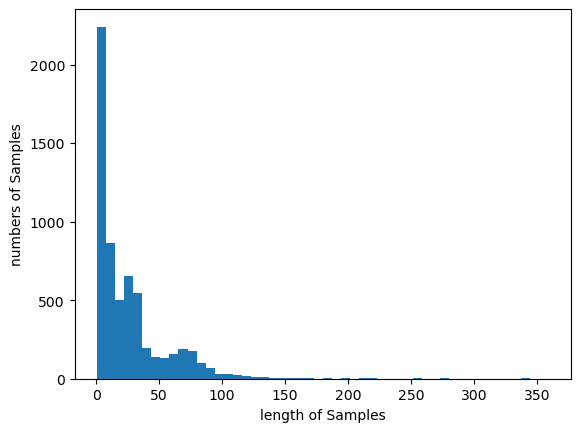

In [140]:
# 샘플의 원소 개수를 그래프로 표시
plt.hist([len(item) for item in X_train], bins=50)
plt.xlabel('length of Samples')
plt.ylabel('numbers of Samples')
plt.show()

In [141]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇%인지 확인하는 함수
def below_threshold_len( max_len, samples ) :
    count = 0
    for sample in samples :
        if len(sample) <= max_len :
            count = count + 1
    print(f"전체 샘플 중 길이가 {max_len}이하인 샘플의 비율 : {count/len(samples)*100:.2f}")

In [142]:
max_len = 100

In [143]:
# 샘플 개수 확인
print(len(X_train))
print(len(X_test))

drop_index = [ idx for idx, item in enumerate(X_train) if len(item) > max_len ]
# 인덱스 목록으로, X_train과 y_train에서 원소 제거
X_train = [x for i, x in enumerate(X_train) if i not in drop_index]
y_train = [y for i, y in enumerate(y_train) if i not in drop_index]

# 5만건에서 정제
drop_index = [ idx for idx, item in enumerate(X_test) if len(item) > max_len ]
X_test = [x for i, x in enumerate(X_test) if i not in drop_index]
y_test = [y for i, y in enumerate(y_test) if i not in drop_index]

# 정리된 샘플 개수 확인
print(len(X_train),len(y_train))     # 학습 데이터의 문제, 답 개수
print(len(X_test),len(y_test))     # 테스트 데이터의 문제, 답 개수

6131
1982
5989 5798
1930 1858


In [144]:
# 모든 샘플들의 길이를 일정하게 변경하기
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test  = pad_sequences(X_test, maxlen=max_len)

In [145]:
print(len(pad_X_train))
print(len(pad_X_test))

5989
1930


In [146]:
# pickle로 정수 인코딩된 데이터를 저장한다
with open('X_train_sequences.pickle','wb') as fw:
    pickle.dump(pad_X_train, fw)
with open('X_test_sequences.pickle','wb') as fw:
    pickle.dump(pad_X_test, fw)

import pickle
with open('y_train_filterd.pickle', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test_filterd.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [147]:
limited_word_index = {}
for word, index in tokenizer.word_index.items():
    if index < vocab_size: 
        limited_word_index[word] = index

import json
# ensure_ascii=False는 한글이 깨지지 않게 저장하기 위함
with open('max_word_index.json', 'w', encoding='utf-8') as f:
    json.dump(limited_word_index, f, ensure_ascii=False)

print(f"\n[수정 후] 전체 단어 사전 크기: {len(tokenizer.word_index)}")
print(f"[수정 후] 저장된 단어 사전 크기: {len(limited_word_index)}")
print(f"의도한 vocab_size: {vocab_size}")


[수정 후] 전체 단어 사전 크기: 18338
[수정 후] 저장된 단어 사전 크기: 5662
의도한 vocab_size: 5663


https://github.com/e9t/nsmc/  
https://www.lucypark.kr/docs/2015-pyconkr